<a href="https://colab.research.google.com/github/Agum82/Praktek-Kecerdasan-Buatan/blob/main/Salinan_dari_Agum_Aidil_Saepul_Rohman_2306010_Pertemuan_1_Latihan_workflow_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = {
    "Tanggal": ["2025-02-01", "2025-02-02", "2025-02-3", "2025-02-04", "2025-02-05"],
    "Produk": ["Minyak Goreng", "Beras", "Gula", "Tepung", "Mie Instan" ],
    "Jumlah Terjual": [10, 5, 7, 3, 12],
    "Stok": [20, 15, 8, 13, 16],
    "Harga Satuan": [15000, 12000, 13000, 11000, 3000],

}
df = pd.DataFrame(data)
df.to_csv("data_penjualan.csv", index=False)

print("File CSV Berhasil dibuat dan Disimpan Sebagai 'data_penjualan.csv'!")


File CSV Berhasil dibuat dan Disimpan Sebagai 'data_penjualan.csv'!


In [ ]:
df = pd.read_csv("data_penjualan.csv")
print(df.head())


      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-01  Minyak Goreng              10    20         15000
1  2025-02-02          Beras               5    15         12000
2   2025-02-3           Gula               7     8         13000
3  2025-02-04         Tepung               3    13         11000
4  2025-02-05     Mie Instan              12    16          3000


In [ ]:
print(df.isnull().sum())
df ["Tanggal"] = pd.to_datetime(df["Tanggal"])
df ["Total penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]
df ["Keuntungan"] = df["Total penjualan"] - (df["Jumlah Terjual"] * 10000)
print(df.head())

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-02-01  Minyak Goreng              10    20         15000   
1 2025-02-02          Beras               5    15         12000   
2 2025-02-03           Gula               7     8         13000   
3 2025-02-04         Tepung               3    13         11000   
4 2025-02-05     Mie Instan              12    16          3000   

   Total penjualan  Keuntungan  
0           150000       50000  
1            60000       10000  
2            91000       21000  
3            33000        3000  
4            36000      -84000  


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))


Akurasi Model: 1.0


In [ ]:
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("produk perlu di-restock!")
else:
    print("Stok masih cukup.")

Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


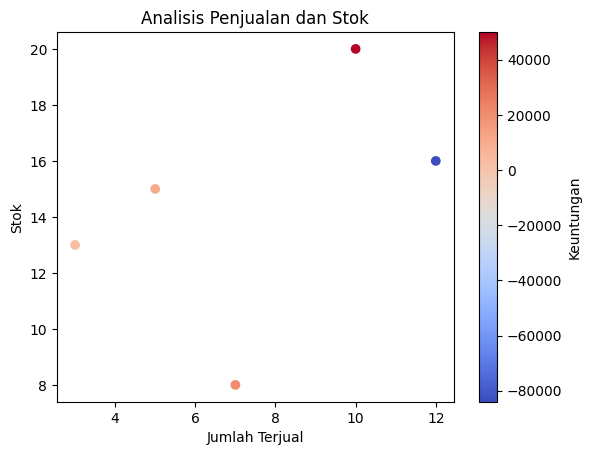

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()
